Input image(s)    --       Target images u would like to discover patterns in

Input layer        --      Takes in target images and preproceess for other
                           layers

Convolutional layer  --    Extract and learns important features from images

Hidden activation      --  Add non linearity to learned features

Pooling layer            --Reduces dimesionality of learned images

Fully connected layr   --Further refines learned features from convolutional
                          layer

Output layer           --Takes learned feature and outputs in shape of learned
                          labels

Output activation      --Adds non linearity to output layer

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-11-11 06:27:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.207, 142.251.6.207, 172.217.214.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   173MB/s    in 0.6s    

2023-11-11 06:27:25 (173 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [5]:
import os
#walk through pizza_steak directory and list no of files
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


To visualise our images,first get class names porperly

In [6]:
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))#create a list of class names from the sub directories
print(class_names)

['pizza' 'steak']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
#function to select an image randomly

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img=mpimg.imread(target_folder+"/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}")#show the shape of image
  return img



Image shape: (512, 512, 3)


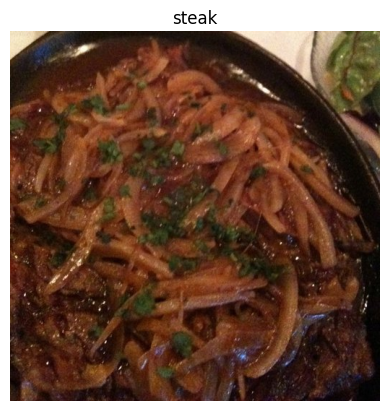

In [8]:

img=view_random_image(target_dir="pizza_steak/train/",target_class="steak")

In [9]:
img

array([[[235, 221, 186],
        [231, 217, 182],
        [239, 225, 190],
        ...,
        [ 90,  87,  36],
        [115, 107,  60],
        [108, 100,  53]],

       [[241, 227, 192],
        [238, 224, 189],
        [244, 230, 195],
        ...,
        [122, 119,  68],
        [127, 121,  73],
        [114, 106,  59]],

       [[243, 229, 194],
        [241, 227, 192],
        [244, 230, 195],
        ...,
        [142, 138,  90],
        [139, 132,  86],
        [130, 123,  77]],

       ...,

       [[ 53,  26,  17],
        [ 51,  24,  15],
        [ 52,  25,  16],
        ...,
        [ 11,   6,  12],
        [ 11,   6,  12],
        [ 12,   7,  13]],

       [[ 60,  31,  23],
        [ 54,  27,  18],
        [ 53,  26,  17],
        ...,
        [ 11,   6,  12],
        [ 10,   5,  11],
        [ 11,   6,  12]],

       [[ 67,  38,  30],
        [ 57,  28,  20],
        [ 51,  24,  15],
        ...,
        [  9,   4,  10],
        [  8,   3,   9],
        [  9,   4,  10]]

In [10]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[235, 221, 186],
        [231, 217, 182],
        [239, 225, 190],
        ...,
        [ 90,  87,  36],
        [115, 107,  60],
        [108, 100,  53]],

       [[241, 227, 192],
        [238, 224, 189],
        [244, 230, 195],
        ...,
        [122, 119,  68],
        [127, 121,  73],
        [114, 106,  59]],

       [[243, 229, 194],
        [241, 227, 192],
        [244, 230, 195],
        ...,
        [142, 138,  90],
        [139, 132,  86],
        [130, 123,  77]],

       ...,

       [[ 53,  26,  17],
        [ 51,  24,  15],
        [ 52,  25,  16],
        ...,
        [ 11,   6,  12],
        [ 11,   6,  12],
        [ 12,   7,  13]],

       [[ 60,  31,  23],
        [ 54,  27,  18],
        [ 53,  26,  17],
        ...,
        [ 11,   6,  12],
        [ 10,   5,  11],
        [ 11,   6,  12]],

       [[ 67,  38,  30],
        [ 57,  28,  20],
        [ 51,  24,  15],
        ...,
        [  9,   4,  1

In [11]:
img.shape#width,height and colour channels

(512, 512, 3)

In [12]:
#Normalisation before passing in to  a model
img/255.#255 is max pixel value

array([[[0.92156863, 0.86666667, 0.72941176],
        [0.90588235, 0.85098039, 0.71372549],
        [0.9372549 , 0.88235294, 0.74509804],
        ...,
        [0.35294118, 0.34117647, 0.14117647],
        [0.45098039, 0.41960784, 0.23529412],
        [0.42352941, 0.39215686, 0.20784314]],

       [[0.94509804, 0.89019608, 0.75294118],
        [0.93333333, 0.87843137, 0.74117647],
        [0.95686275, 0.90196078, 0.76470588],
        ...,
        [0.47843137, 0.46666667, 0.26666667],
        [0.49803922, 0.4745098 , 0.28627451],
        [0.44705882, 0.41568627, 0.23137255]],

       [[0.95294118, 0.89803922, 0.76078431],
        [0.94509804, 0.89019608, 0.75294118],
        [0.95686275, 0.90196078, 0.76470588],
        ...,
        [0.55686275, 0.54117647, 0.35294118],
        [0.54509804, 0.51764706, 0.3372549 ],
        [0.50980392, 0.48235294, 0.30196078]],

       ...,

       [[0.20784314, 0.10196078, 0.06666667],
        [0.2       , 0.09411765, 0.05882353],
        [0.20392157, 0

##An end-to-end example

Load our images

Preprocess images

Build cnn

compile cnn

fit cnn to training data


We cannot do like the above steps cause in the above we did for one image so doing it for all the images one by one is tedious and exhausting


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
tf.random.set_seed(42)

In [15]:
#preprocess data(get all pixel values between 0&1)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

#setup path to our data directories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#Import data from directories and turn it into batches
train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data=valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

#compile our CNN
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 150ms/step - loss: 0.5825 - accuracy: 0.6840 - val_loss: 0.4689 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 7s 159ms/step - loss: 0.4603 - accuracy: 0.7980 - val_loss: 0.3844 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 7s 145ms/step - loss: 0.4346 - accuracy: 0.8053 - val_loss: 0.3615 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.4102 - accuracy: 0.8280 - val_loss: 0.3499 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 7s 146ms/step - loss: 0.3678 - accuracy: 0.8493 - val_loss: 0.3681 - val_accuracy: 0.8340


##Switch to gpu before running the above cell

In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

In [17]:
##Using same model we used before
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
history_2 = model_2.fit(train_data, # use same training data created above
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data, # use same validation data created above
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 129ms/step - loss: 1.3659 - accuracy: 0.5073 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 148ms/step - loss: 0.6929 - accuracy: 0.5013 - val_loss: 0.6909 - val_accuracy: 0.5080
Epoch 3/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6946 - accuracy: 0.5107 - val_loss: 0.7000 - val_accuracy: 0.4980
Epoch 4/5
47/47 [==============================] - 8s 168ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 128ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [18]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having more params model 2 performs terribly ..so lets try to improve it


In [19]:
tf.random.set_seed(42)

#same as above model but lets step it up
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model_3.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 119ms/step - loss: 4.1811 - accuracy: 0.5873 - val_loss: 1.1253 - val_accuracy: 0.6980
Epoch 2/5
47/47 [==============================] - 7s 154ms/step - loss: 0.8440 - accuracy: 0.6920 - val_loss: 0.6815 - val_accuracy: 0.7080
Epoch 3/5
47/47 [==============================] - 8s 165ms/step - loss: 0.6384 - accuracy: 0.7373 - val_loss: 0.4428 - val_accuracy: 0.7960
Epoch 4/5
47/47 [==============================] - 8s 170ms/step - loss: 0.5142 - accuracy: 0.7680 - val_loss: 0.4832 - val_accuracy: 0.7600
Epoch 5/5
47/47 [==============================] - 6s 130ms/step - loss: 0.5629 - accuracy: 0.7493 - val_loss: 0.5595 - val_accuracy: 0.7480


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Trainable parameters can be though of as the patterns a model can learn from data.Most cases higher the params better,but in this case he difference here is the two different styles of models.

CNN seeks to sort out and learn the most important patterns so even though less parameters in CNN,it performs better

##Binary classifictaion:let's break it down

1.Become one with data(visualise,visualise,visualise)

2.preprocess the data(prepare it for model ie scaling/normalisation)

3.Created a model(start with a baseline)

4.Fit

5.Evaluate

6.Adjust param and improve model

##1)Becoming one with Data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


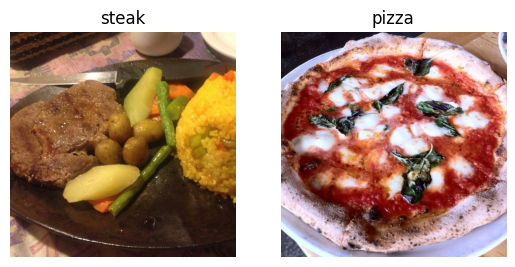

In [21]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

##2. Preprocess the data (prepare it for a model)
One of the most important steps for a machine learning project is creating a training and test set.

In our case, our data is already split into training and test sets. Another option here might be to create a validation set as well, but we'll leave that for now.

For an image classification project, it's standard to have your data seperated into train and test directories with subfolders in each for each class.

To start we define the training and test directory paths.

In [22]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches.

A batch is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:

10,000 images (or more) might not fit into the memory of your processor (GPU).
Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.
Why 32?

A batch size of 32 is good for your health.

No seriously, there are many different batch sizes you could use but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn our data into batches, we'll first create an instance of ImageDataGenerator for each of our datasets.

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The ImageDataGenerator class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've noticed the rescale parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

The rescale parameter, along with 1/255. is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).

🔑 Note: For more transformation options such as data augmentation (we'll see this later), refer to the ImageDataGenerator documentation.

Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the flow_from_directory method.

In [24]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Wonderful! Looks like our training dataset has 1500 images belonging to 2 classes (pizza and steak) and our test dataset has 500 images also belonging to 2 classes.

Some things to here:

Due to how our directories are structured, the classes get inferred by the subdirectory names in train_dir and test_dir.
The target_size parameter defines the input size of our images in (height, width) format.
The class_mode value of 'binary' defines our classification problem type. If we had more than two classes, we would use 'categorical'.
The batch_size defines how many images will be in each batch, we've used 32 which is the same as the default.
We can take a look at our batched images and labels by inspecting the train_data object.

3. Create a model (start with a baseline)
You might be wondering what your default model architecture should be.

And the truth is, there's many possible answers to this question.

A simple heuristic for computer vision models is to use the model architecture which is performing best on ImageNet (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which you try to improve upon.

🔑 Note: In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In our case, let's take a smaller version of the model that can be found on the CNN explainer website (model_1 from above) and build a 3 layer convolutional neural network.

In [25]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu',
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

In [26]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [27]:
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 10s 166ms/step - loss: 0.6887 - accuracy: 0.7053 - val_loss: 0.4580 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 6s 134ms/step - loss: 0.4696 - accuracy: 0.7900 - val_loss: 0.4365 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 7s 156ms/step - loss: 0.2844 - accuracy: 0.8947 - val_loss: 0.4231 - val_accuracy: 0.8000
Epoch 4/5
47/47 [==============================] - 6s 127ms/step - loss: 0.1844 - accuracy: 0.9387 - val_loss: 0.4768 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 7s 154ms/step - loss: 0.0786 - accuracy: 0.9813 - val_loss: 0.5216 - val_accuracy: 0.8040


#Evaluating our model

In [28]:
import pandas as pd

<Axes: >

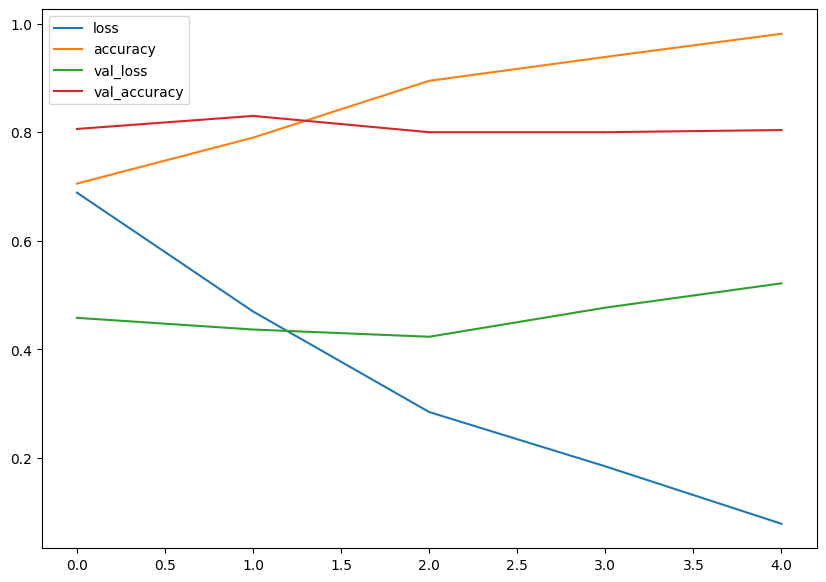

In [29]:
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [30]:
#Plot the validation and training curves seperately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

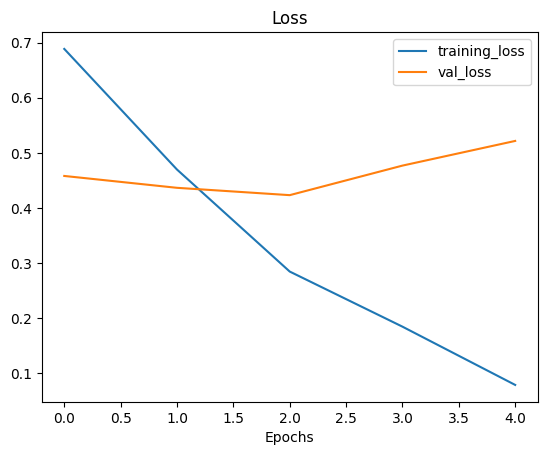

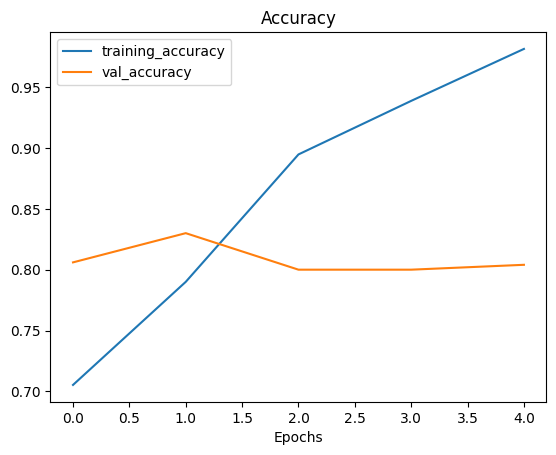

In [31]:
plot_loss_curves(history_4)


The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [32]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

--2023-11-11 06:30:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2023-11-11 06:30:25 (29.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



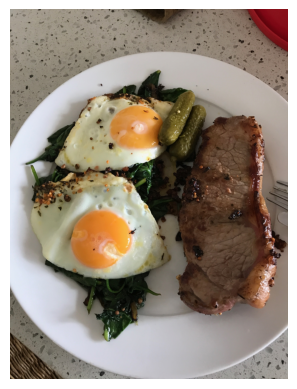

In [33]:
# View our example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);


In [34]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [35]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model_4.predict(steak)

ValueError: ignored

There's one more problem...

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of (batch_size, 224, 224, 3).

We can fix this by adding an extra to our custom image tensor using tf.expand_dims

In [37]:
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
pred = model_4.predict(steak)
pred

In [ ]:
class_names

In [ ]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

In [ ]:
pred_and_plot(model_4, "03-steak.jpeg", class_names)